# 1. Load data and import libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from nltk.corpus import stopwords

In [2]:
df_1 = pd.read_csv('./../Data/Dataframes/dataframe_Condorcet_1.csv')
df_2 = pd.read_csv('./../Data/Dataframes/dataframe_Condorcet_2.csv')

In [3]:
df_1.head(2)

,Savant,Auteur,Annee,Eloge
0,de la Chambre,Condorcet,1773,"[Condorcet avait mis, en marge de cette premiè..."
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou..."


In [4]:
df_2.head(2)

,Savant,Auteur,Annee,Eloge
0,Euler,Condorcet,1783,"Léonard Euler, directeur de la classe de mathé..."
1,Bézout,Condorcet,1783,"Étienne Bézout, de l’Académie des sciences et ..."


In [5]:
df = pd.concat([df_1, df_2], ignore_index = True)

In [6]:
df.shape

(66, 4)

In [7]:
df_1.shape

(39, 4)

In [8]:
df_2.shape

(27, 4)

In [9]:
39+27

66

In [10]:
pd.set_option('display.max_rows', 100)

In [11]:
df.sort_values(by='Annee')

,Savant,Auteur,Annee,Eloge
25,Fontaine,Condorcet,1771,Alexis Fontaine naquit à Claveison en Dauphiné...
0,de la Chambre,Condorcet,1773,"[Condorcet avait mis, en marge de cette premiè..."
24,Bevis,Condorcet,1773,"Ce savant, mort en 1771, à l’âge de soixante-s..."
23,Le Seur,Condorcet,1773,"[Condorcet écrivait à Voltaire, le 16 février ..."
22,Le Cat,Condorcet,1773,Il avait placé son nom sur la liste de presque...
21,Klingenstierna,Condorcet,1773,"La Suède, occupée à réparer les pertes que les..."
20,Muschenbroek,Condorcet,1773,"On trouve, dans ses ouvrages, une longue suite..."
19,Bianchi,Condorcet,1773,"Il est mort en 1760, âgé de quatre-vingts ans,..."
18,Peyssonnel,Condorcet,1773,Les naturalistes doivent à M. Peyssonnel les p...
17,Cheselden,Condorcet,1773,Il ne doit pas être placé au nombre des grands...


In [12]:
#Correcting wrong date on eulogy

df[df['Savant']=='de Fourcroy']

,Savant,Auteur,Annee,Eloge
62,de Fourcroy,Condorcet,1804,"Charles-René de Fourcroy, maréchal de camp, gr..."


In [13]:
df['Annee'][62] = 1791

<ipython-input-13-7b941fc02e86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annee'][62] = 1791


In [14]:
df[df['Savant']=='de Fourcroy']

,Savant,Auteur,Annee,Eloge
62,de Fourcroy,Condorcet,1791,"Charles-René de Fourcroy, maréchal de camp, gr..."


# 2. Exploring

<AxesSubplot:>

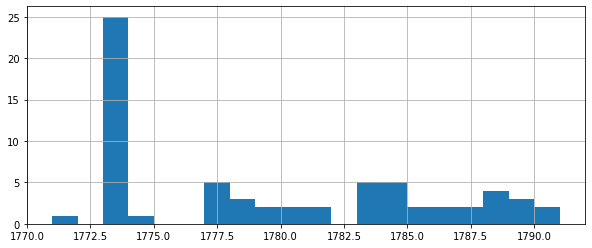

In [17]:
bins = max(df['Annee'])-min(df['Annee'])
df['Annee'].hist(bins = bins, figsize = (10,4))

In [18]:
df[df['Annee']<1776].shape

(27, 4)

In [19]:
df[df['Annee']>1793].shape

(0, 4)

Condorcet a été secrétaire de 1776 à 1793

Il a écrit 27 éloges sans être secrétaire perpétuel


# 3. Pre-processing

## a. Removing side-information whithin brackets

Some eulogies start with a side note, that is not part of the eulogy per say but provides some information

In [20]:
df['Side_Info'] = df['Eloge'].apply(lambda x : '[' in x)
df[df['Side_Info']].shape

(19, 5)

In [21]:
df[df['Side_Info']]

,Savant,Auteur,Annee,Eloge,Side_Info
0,de la Chambre,Condorcet,1773,"[Condorcet avait mis, en marge de cette premiè...",True
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou...",True
2,Picard,Condorcet,1773,[Voyez sur Picard l’Histoire céleste. Il a sou...,True
3,Mariotte,Condorcet,1773,"Edme Mariotte naquit à Dijon, ou du moins il y...",True
5,Blondel,Condorcet,1773,"François Blondel naquit à Ribemont, en Picardi...",True
6,Huygens,Condorcet,1773,"Christian Huygens naquit à la Haye, le 14 avri...",True
8,Roëmer,Condorcet,1773,"[Voyez le Recueil des œuvres de Leibniz, par M...",True
23,Le Seur,Condorcet,1773,"[Condorcet écrivait à Voltaire, le 16 février ...",True
25,Fontaine,Condorcet,1771,Alexis Fontaine naquit à Claveison en Dauphiné...,True
26,de La Condamine,Condorcet,1774,"Charles-Marie de La Condamine, pensionnaire ch...",True


In [22]:
#Checking the code works
re.findall('\[(.*?)\]', df.loc[0, 'Eloge'])

['Condorcet avait mis, en marge de cette première partie des Éloges, quelques indications des corrections ou des développements qu’il avait le projet d’y faire. Nous les avons précieusement conservées : elles donnent une idée de sa manière de travailler, et sa simplicité, sa candeur, son amour pour la vérité s’y montrent à chaque mot. (Note des premiers éditeurs.)',
 'Expliquer pourquoi ces assertions ne parurent point impies.',
 'Sur ses expériences et sa querelle avec Torricelli, voir la Vie de Torricelli, par l’abbé Fabrini; et sur ses démêlés avec Descartes, voir la Vie de Descartes, par Baillet',
 'Roberval ayant fait exécuter une machine, elle ne produisit pas l’effet qu’il en attendait : étonné de son erreur, il regardait la machine avec colère : Voyez, dit Mariotte, M. de Roberval, qui dit des injures à la nature, parce qu’elle ne veut pas s’accorder aux les lois de sa géométrie']

In [23]:
#Applying on the whole dataframe

df['Side_Info'] = df['Eloge'].apply(lambda x : re.findall('\[(.*?)\]', x))

In [24]:
#Checking code works for removing the side note from the eulogy

re.sub('\[(.*?)\]','', df.loc[0, 'Eloge'])

" \\n Marin Cureau de la Chambre, médecin ordinaire du roi, naquit au Mans vers 1613. Le chancelier Séguier se l’attacha, moins pour son habileté dans la médecine, que pour l’étendue et la variété de Ses connaissances. La confiance de ce ministre fournissait à la Chambre le moyen d’être utile aux gens de lettres, et il en saisissait avidement toutes les occasions. Il était bien éloigné de dédaigner les Sciences après avoir fait fortune par elles : espèce d’ingratitude qui n’est malheureusement que trop commune. Le cardinal de Richelieu lui donna une place dans l’Académie française, lors de Son établissement en 1635, et le chargea, en 1640, de répondre au livre de Hersant, en faveur des prétentions de la cour de Rome. Ce livre fut regardé en France comme séditieux, et l’on ordonna des recherches contre l’auteur, qui chercha un asile auprès de ceux dont il avait défendu la cause ; mais à Rome même il fut poursuivi par l’inquisition, comme janséniste, et excommunié pour n’avoir point comp

In [25]:
#Applying to the whole corpus

df['Eloge'] = df['Eloge'].apply(lambda x : re.sub('\[(.*?)\]','', x))

## b. Removing \n, \t, non useful spaces

In [26]:
df['Eloge'] = df['Eloge'].apply(lambda x : x.replace("\\n", "").replace("\\t", "").replace("\n", "").replace("\t", "")
                               .strip())

In [27]:
df

,Savant,Auteur,Annee,Eloge,Side_Info
0,de la Chambre,Condorcet,1773,"Marin Cureau de la Chambre, médecin ordinaire ...","[Condorcet avait mis, en marge de cette premiè..."
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou...","[Il y a, dit-on, quelques pièces licencieuses ..."
2,Picard,Condorcet,1773,L’abbé Picard naquit dans un temps où Kepler e...,[Voyez sur Picard l’Histoire céleste. Il a sou...
3,Mariotte,Condorcet,1773,"Edme Mariotte naquit à Dijon, ou du moins il y...",[Savoir si ce que je dis ici de la ville de Di...
4,Duclos,Condorcet,1773,"Samuel Cotreau Duclos, médecin ordinaire du ro...",[]
5,Blondel,Condorcet,1773,"François Blondel naquit à Ribemont, en Picardi...",[Voltaire doit servir de réponse à ceux qui di...
6,Huygens,Condorcet,1773,"Christian Huygens naquit à la Haye, le 14 avri...",[Ajouter ce qu'il a fait sur les fractions con...
7,Charas,Condorcet,1773,"Moïse Charas naquit à Usez vers 1618, d’une fa...",[]
8,Roëmer,Condorcet,1773,Souvent l’observation d’un phénomène suffit po...,"[Voyez le Recueil des œuvres de Leibniz, par M..."
9,Rohaut,Condorcet,1773,"Au sortir du collège, où l’on n’enseignait enc...",[]


## c. Adding space between " and ( )

In [28]:
#df['Eloge'] = df['Eloge'].apply(lambda x : x.replace('"', ' " ').replace('(', ' ( ').replace(')', ' ) '))

# 4. Analyzing the eulogies

## a. Number of characters

### 1. Generally

Text(0.5, 1.0, 'Number of characters per eulogies')

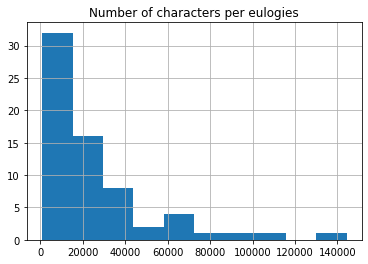

In [29]:
df['Eloge'].str.len().hist()
plt.title('Number of characters per eulogies')

### 2. Through the years

In [30]:
df['Number of characters'] = df['Eloge'].apply(lambda x : len(str(x)))

nbr_charac = df.groupby(['Annee']).agg({'Number of characters' : 'mean'}).reset_index()


Text(0.5, 1.0, 'Evolution of number of characters through the years')

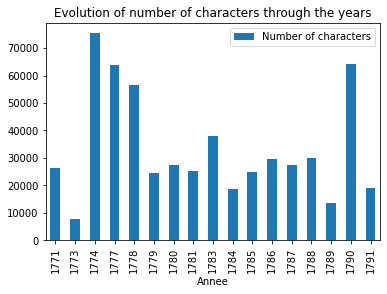

In [31]:
nbr_of_years = max(df.Annee)-min(df.Annee)

nbr_charac.plot(x= 'Annee', y = 'Number of characters', kind = 'bar')
plt.title('Evolution of number of characters through the years')

## b. Number of words per eulogy

### 1. Generally

Text(0, 0.5, 'Number of eulogies')

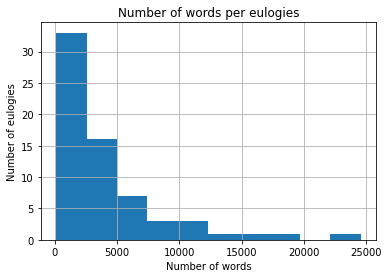

In [32]:
df['Eloge'].str.split().map(lambda x : len(x)).hist()
plt.title('Number of words per eulogies')
plt.xlabel('Number of words')
plt.ylabel('Number of eulogies')

### 2. Through the years

<AxesSubplot:xlabel='Annee'>

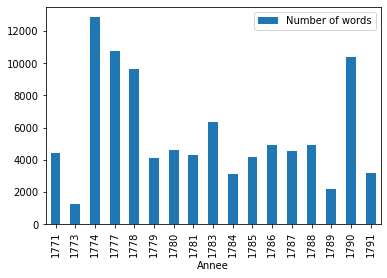

In [33]:
df['Number of words'] = df['Eloge'].apply(lambda x : len(x.split()))

nbr_words = df.groupby(['Annee']).agg({'Number of words' : 'mean'}).reset_index()

nbr_words.plot(x = 'Annee', y = 'Number of words', kind = 'bar')

In [42]:
df[(df['Annee']==1774)|(df['Annee']==1777)|(df['Annee']==1778)]

,Savant,Auteur,Annee,Eloge,Eloge_no_sw_no_punkt,Eloge_lem,NER,NER_list,PER,LOC,MISC,ORG
26,de La Condamine,Condorcet,1774,"Charles-Marie de La Condamine, pensionnaire ch...",Charles Marie Condamine pensionnaire chimiste ...,Charles Marie condamine pensionnaire chimist c...,"{'PER': 97, 'ORG': 11, 'LOC': 107, 'MISC': 37}","((Charles, Marie), (académie), (Société, royal...",97.0,107.0,37.0,11.0
27,Trudaine,Condorcet,1777,"Jean-Charles Philibert Trudaine, conseiller d’...",Jean Charles Philibert Trudaine conseiller Éta...,Jean Charles Philibert Trudaine conseiller éta...,"{'PER': 32, 'ORG': 8, 'LOC': 46, 'MISC': 10}","((Jean, Charles, Philibert, Trudaine), (académ...",32.0,46.0,10.0,8.0
28,de Jussieu,Condorcet,1777,"Bernard de Jussieu, docteur en médecine des fa...",Bernard Jussieu docteur médecine facultés Pari...,Bernard Jussieu docteur médecin faculter Paris...,"{'PER': 100, 'LOC': 35, 'ORG': 3, 'MISC': 12}","((Bernard, Jussieu), (Paris), (Société, royal,...",100.0,35.0,12.0,3.0
29,de Bourdelin,Condorcet,1777,"Louis Claude de Bourdelin, docteur régent, et ...",Louis Claude Bourdelin docteur régent ancien d...,Louis Claude Bourdelin docteur régent ancien d...,"{'PER': 21, 'LOC': 13, 'ORG': 2, 'MISC': 9}","((Louis, Claude, Bourdelin), (Paris), (Académi...",21.0,13.0,9.0,2.0
30,de Haller,Condorcet,1777,"Albert de Haller, membre du conseil souverain ...",Albert Haller membre conseil souverain Berne p...,Albert Haller membre conseil souverain Berne p...,"{'PER': 100, 'LOC': 38, 'ORG': 8, 'MISC': 15}","((Albert, Haller), (Berne), (Académie), (Scien...",100.0,38.0,15.0,8.0
31,Malouin,Condorcet,1778,"Paul-Jacques Malouin, pensionnaire chimiste de...",Paul Jacques Malouin pensionnaire chimiste Aca...,Paul Jacques Malouin pensionnaire chimiste aca...,"{'PER': 37, 'ORG': 3, 'LOC': 16, 'MISC': 3}","((Paul, Jacques, Malouin), (académie, royal, s...",37.0,16.0,3.0,3.0
32,de Linné,Condorcet,1778,"Charles de Linné, plus connu sous le nom de Li...",Charles Linné plus connu sous nom Linnaeus che...,Charles Linné plus connaître sous nom linnaeu ...,"{'PER': 67, 'LOC': 39, 'ORG': 9, 'MISC': 10}","((Charles, Linné), (Suède), (Académie), (Paris...",67.0,39.0,10.0,9.0
64,de L'Hôpital,Condorcet,1777,Chancelier de France. Discours présenté à L’ac...,Chancelier France Discours présenté académie F...,Chancelier France discours présenter académie ...,"{'LOC': 153, 'ORG': 13, 'PER': 297, 'MISC': 66}","((France), (académie, francaise), (jett, regar...",297.0,153.0,66.0,13.0
65,Pascal,Condorcet,1778,"Blaise Pascal naquit à Clermont, en Auvergne, ...",Blaise Pascal naquit Clermont Auvergne juin 16...,blaise pascal naître Clermont auvergn juin 162...,"{'PER': 272, 'LOC': 68, 'MISC': 96, 'ORG': 4}","((blaise, pascal), (Clermont), (Étienne), (Ant...",272.0,68.0,96.0,4.0


Both graphs of the evolution though time of number of characters and of number of words per eulogy look-alike. From 1774 to 1778 and in 1790, the eulogies are on average longer. While from 1779 to 1788, they are roughly of the same length. In 1773 and in 1789 they are significantly smaller. In 1773, Condorcet was not perpetual secretary.

The eulogies seem to be longer at the beginning then shorter on average.

In [34]:
df[(df['Annee']==1773) | (df['Annee']==1789)]

,Savant,Auteur,Annee,Eloge,Side_Info,Number of characters,Number of words
0,de la Chambre,Condorcet,1773,"Marin Cureau de la Chambre, médecin ordinaire ...","[Condorcet avait mis, en marge de cette premiè...",15356,2538
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou...","[Il y a, dit-on, quelques pièces licencieuses ...",4965,793
2,Picard,Condorcet,1773,L’abbé Picard naquit dans un temps où Kepler e...,[Voyez sur Picard l’Histoire céleste. Il a sou...,10969,1801
3,Mariotte,Condorcet,1773,"Edme Mariotte naquit à Dijon, ou du moins il y...",[Savoir si ce que je dis ici de la ville de Di...,14955,2478
4,Duclos,Condorcet,1773,"Samuel Cotreau Duclos, médecin ordinaire du ro...",[],9344,1564
5,Blondel,Condorcet,1773,"François Blondel naquit à Ribemont, en Picardi...",[Voltaire doit servir de réponse à ceux qui di...,22358,3743
6,Huygens,Condorcet,1773,"Christian Huygens naquit à la Haye, le 14 avri...",[Ajouter ce qu'il a fait sur les fractions con...,25931,4337
7,Charas,Condorcet,1773,"Moïse Charas naquit à Usez vers 1618, d’une fa...",[],5836,965
8,Roëmer,Condorcet,1773,Souvent l’observation d’un phénomène suffit po...,"[Voyez le Recueil des œuvres de Leibniz, par M...",21992,3632
9,Rohaut,Condorcet,1773,"Au sortir du collège, où l’on n’enseignait enc...",[],2271,378


## c. Average word length

### 1. Generally

Text(0.5, 1.0, 'Average word length in the eulogies')

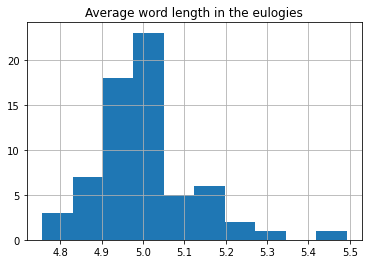

In [35]:
df['Eloge'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)).hist()
plt.title('Average word length in the eulogies')

### 2. Through the years

In [36]:
import statistics

df['Avg Word Length'] = df['Eloge'].apply(lambda x : statistics.mean([len(i) for i in x.split()]))

Text(0.5, 1.0, 'Evolution of the average word length')

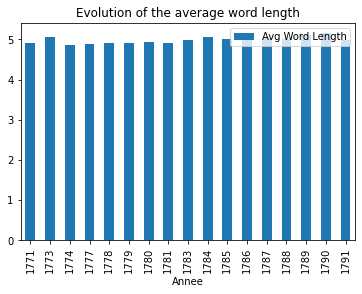

In [37]:
avg_word = df.groupby(['Annee']).agg({'Avg Word Length' : 'mean'}).reset_index()

avg_word.plot('Annee', 'Avg Word Length', kind = 'bar')

plt.title('Evolution of the average word length')

The average word length stays the same through the years.

## d. Average sentence length

### 1. Generally

In [38]:
#https://onecompiler.com/python/3wrds77az

#function to calculate the average sentence length across a piece of text.
def avg_sentence_len(text):
    sentences = text.split(".") #split the text into a list of sentences.
    words = text.split(" ") #split the input text into a list of separate words
    if(sentences[len(sentences)-1]==""): #if the last value in sentences is an empty string
        average_sentence_length = len(words) / len(sentences)-1
    else:
        average_sentence_length = len(words) / len(sentences)
    return average_sentence_length #returning avg length of sentence

Text(0.5, 1.0, 'Average length of the sentences in the eulogies')

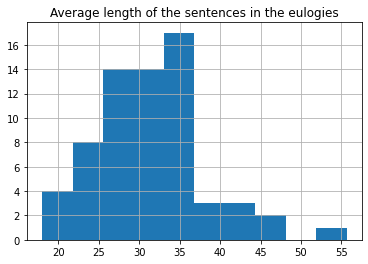

In [39]:
df['Eloge'].apply(lambda x : avg_sentence_len(x)).hist()
plt.title('Average length of the sentences in the eulogies')

### 2. Through the years

Text(0.5, 1.0, 'Evolution of the sentence length through the years')

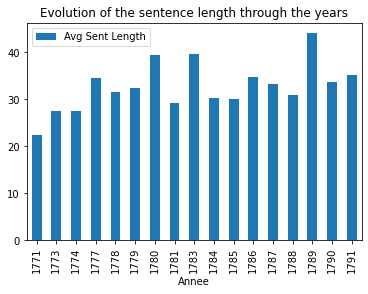

In [40]:
df['Avg Sent Length'] = df['Eloge'].apply(lambda x : avg_sentence_len(x))

avg_sent = df.groupby(['Annee']).agg({'Avg Sent Length' : 'mean'}).reset_index()

avg_sent.plot('Annee', 'Avg Sent Length', kind = 'bar')
plt.title('Evolution of the sentence length through the years')

The average word length stays between 28 and 32 words except for the years 1780, 1781, 1789.

# 5. Removing stop-words

In [18]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/clemencebarsi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/1-3-top-stopwords-barchart-b953763c-3fea-4331-bff0-429411793e5f/5c0fca05-ba07-4564-a02e-c44b08bfb8cb

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('french'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    plt.title('Most appearing stop words')
    plt.xlabel('Stop words')
    plt.ylabel('Number of apparitions')

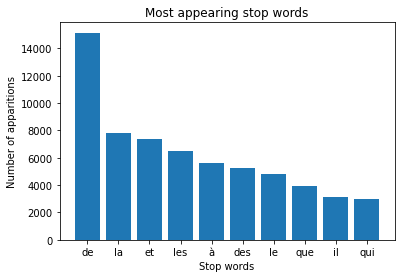

In [43]:
plot_top_stopwords_barchart(df['Eloge'])

In [44]:
def remove_sw(string, stop = stop) :
    string_sp = string.split()
    no_sw = [s for s in string_sp if s not in stop]
    return ' '.join(no_sw)


df['no_sw'] = df['Eloge'].apply(lambda x : remove_sw(x))

In [45]:
df.head()

,Savant,Auteur,Annee,Eloge,Side_Info,Number of characters,Number of words,Avg Word Length,Avg Sent Length,no_sw
0,de la Chambre,Condorcet,1773,"Marin Cureau de la Chambre, médecin ordinaire ...","[Condorcet avait mis, en marge de cette premiè...",15356,2538,5.041371,30.629630,"Marin Cureau Chambre, médecin ordinaire roi, n..."
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou...","[Il y a, dit-on, quelques pièces licencieuses ...",4965,793,5.252207,24.838710,"Nicolas Frenicle Bessy, conseiller cour monnai..."
2,Picard,Condorcet,1773,L’abbé Picard naquit dans un temps où Kepler e...,[Voyez sur Picard l’Histoire céleste. Il a sou...,10969,1801,5.082177,26.119403,L’abbé Picard naquit temps où Kepler Galilée v...
3,Mariotte,Condorcet,1773,"Edme Mariotte naquit à Dijon, ou du moins il y...",[Savoir si ce que je dis ici de la ville de Di...,14955,2478,5.029459,31.802632,"Edme Mariotte naquit Dijon, moins passa partie..."
4,Duclos,Condorcet,1773,"Samuel Cotreau Duclos, médecin ordinaire du ro...",[],9344,1564,4.964834,34.909091,"Samuel Cotreau Duclos, médecin ordinaire roi, ..."


# 6. Top N-grams

## a. With stop-words

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
#https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

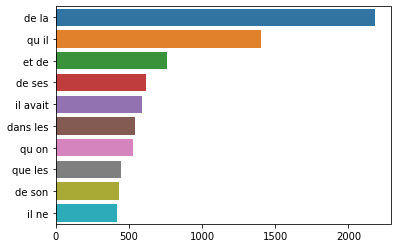

In [48]:
top_n_bigrams=get_top_ngram(df['Eloge'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

## b. Without stop-words

<AxesSubplot:>

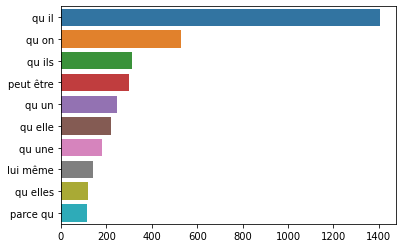

In [49]:
top_n_bigrams=get_top_ngram(df['no_sw'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

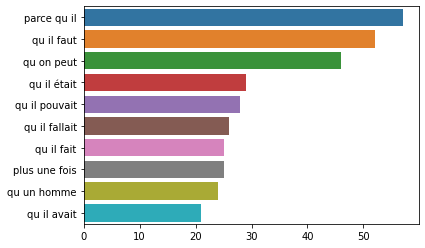

In [50]:
top_n_bigrams=get_top_ngram(df['no_sw'],3)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

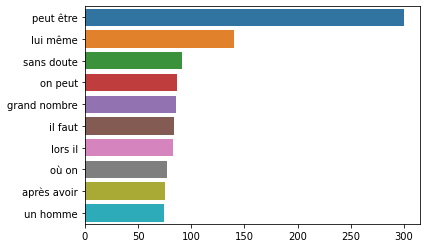

In [51]:
df['no_sw_no_qu'] = df['no_sw'].apply(lambda x : x.replace('qu', ''))
top_n_bigrams=get_top_ngram(df['no_sw_no_qu'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

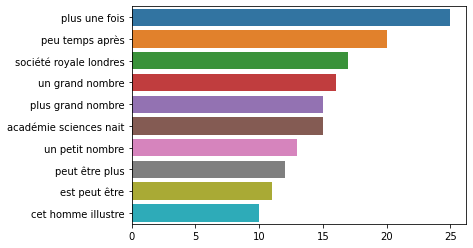

In [52]:
df['no_sw_no_qu'] = df['no_sw'].apply(lambda x : x.replace('qu', ''))
top_n_bigrams=get_top_ngram(df['no_sw_no_qu'],3)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

# 7. Topic Modelling

In [19]:
#https://towardsdatascience.com/6-tips-to-optimize-an-nlp-topic-model-for-interpretability-20742f3047e2

import spacy
nlp = spacy.load("fr_core_news_sm")


# Example for detecting bigrams 
bigram_measures = nltk.collocations.BigramAssocMeasures()
#df['Eloge_no_sw_no_punkt'] = df['Eloge_no_sw_no_punkt'].apply(lambda x : x.replace("'", " "))
df['Eloge_no_sw_no_punkt'] = df['Eloge'].apply(lambda x : re.sub(r'[^\w\s]', ' ', x))
df['Eloge_no_sw_no_punkt'] = df['Eloge_no_sw_no_punkt'].apply(lambda x : " ".join([i for i in x.split() if (i not in stop and len(i)>2)]))
df['Eloge_lem'] = df['Eloge_no_sw_no_punkt'].apply(lambda x : " ".join([token.lemma_ for token in nlp(x)]))
finder = nltk.collocations.BigramCollocationFinder.from_documents([x.split() for x in df['Eloge_lem']])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [255]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([x.split() for x in df['Eloge_lem']])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(10)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [256]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [257]:
trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [258]:
import nltk
nltk.download('averaged_perceptron_tagger')
# Example filter for noun-type structures bigrams

def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop or bigram[1] in stop:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True
# Can eyeball list and choose PMI threshold where n-grams stop making sense
# In this case, get top 500 bigrams/trigrams with highest PMI score
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram: bigram_filter(bigram['bigram'])and bigram.pmi > 5, axis = 1)][:500]
bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/clemencebarsi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [259]:
# Filter for trigrams with only noun-type structures
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop or trigram[-1] in stop or trigram[1] in stop:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

#filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: trigram_filter(trigram['trigram'])and trigram.pmi > 5, axis = 1)][:500]
#trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]


/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [260]:
bigrams[:10]


/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['histoire naturel',
 'petit nombre',
 'regarder comme',
 'grand nombre',
 'après avoir',
 'académie science',
 'pouvoir être',
 'autant plus']

In [261]:
def replace_ngram(x):
   # for gram in trigrams:
   #x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

reviews_w_ngrams = df.copy()

reviews_1776 = df[df['Annee']<1776]

reviews_1789 = df[(df['Annee']>=1776)|(df['Annee']<1789)]

reviews_1791 = df[(df['Annee']>=1789)]

reviews_w_ngrams.Eloge_lem = reviews_w_ngrams.Eloge_lem.map(lambda x: replace_ngram(x))

reviews_w_ngrams = reviews_w_ngrams.Eloge_lem.map(lambda x: [word for word in x.split() if word not in stop 
                                                         and len(word) > 2])

reviews_1776.Eloge_lem = reviews_1776.Eloge_lem.map(lambda x: replace_ngram(x))

reviews_1776 = reviews_1776.Eloge_lem.map(lambda x: [word for word in x.split() if word not in stop 
                                                         and len(word) > 2])
reviews_1789.Eloge_lem = reviews_1789.Eloge_lem.map(lambda x: replace_ngram(x))

reviews_1789 = reviews_1789.Eloge_lem.map(lambda x: [word for word in x.split() if word not in stop 
                                                         and len(word) > 2])
reviews_1791.Eloge_lem = reviews_1791.Eloge_lem.map(lambda x: replace_ngram(x))

reviews_1791 = reviews_1791.Eloge_lem.map(lambda x: [word for word in x.split() if word not in stop 
                                                         and len(word) > 2])

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [262]:
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

final_reviews = reviews_w_ngrams.map(noun_only)

final_1776 = reviews_1776.map(noun_only)

final_1789 = reviews_1789.map(noun_only)

final_1791 = reviews_1791.map(noun_only)



/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
dictionary = gensim.corpora.Dictionary(final_reviews)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_reviews]


/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [264]:
coherence = []
for k in range(1,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24


/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


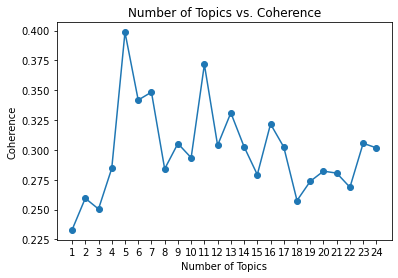

In [267]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [268]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=40,iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [269]:
ldamodel2 = Lda(doc_term_matrix, num_topics=11, id2word = dictionary, passes=40,iterations=200,  chunksize = 10000, eval_every = None, random_state=0)



/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [271]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

topic_data =  pyLDAvis.gensim_models.prepare(ldamodel2, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 8. WordClouds

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


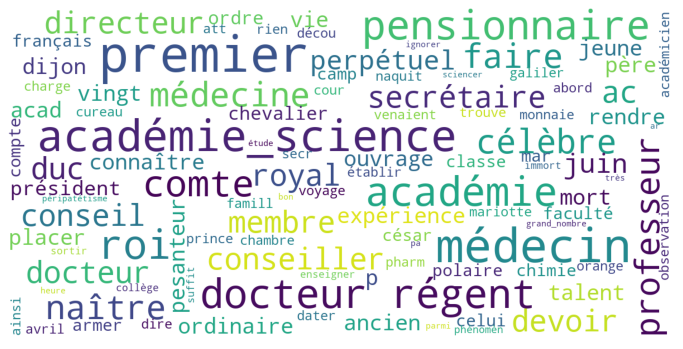

In [272]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(final_reviews)

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


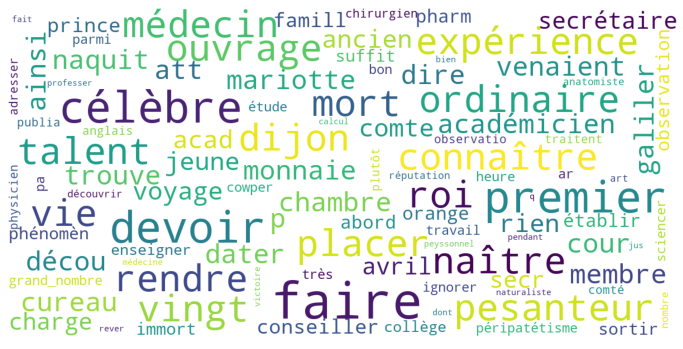

In [273]:
show_wordcloud(final_1776)

Mot Dijon beaucoup plus important rapport avec les provinces
Enseigner
Devoir

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


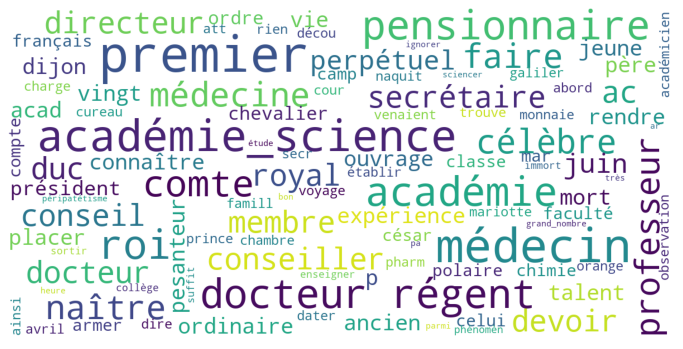

In [274]:
show_wordcloud(final_1789)

Secrétaire perpétuel
Roi
Régent
Médecin
Pensionnaire
Duc

/Users/clemencebarsi/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


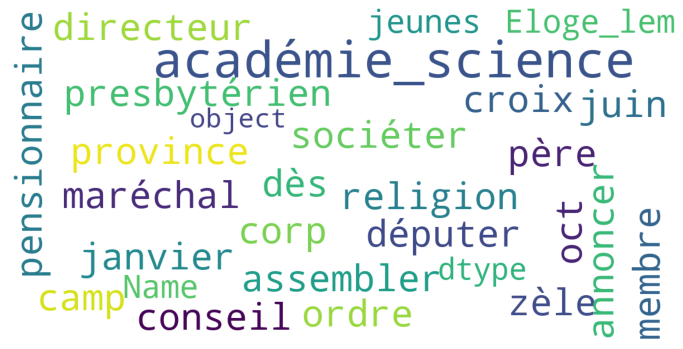

In [275]:
show_wordcloud(final_1791)

# 9. TextBlob

- polarity: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

- subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1].

## a. Polarity

In [58]:
from textblob import TextBlob

Text(0.5, 1.0, 'Histogram of polarity though the whole corpus')

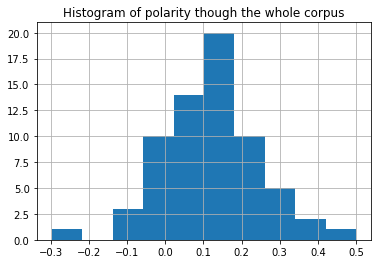

In [59]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score']=df['Eloge'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

plt.title('Histogram of polarity though the whole corpus')

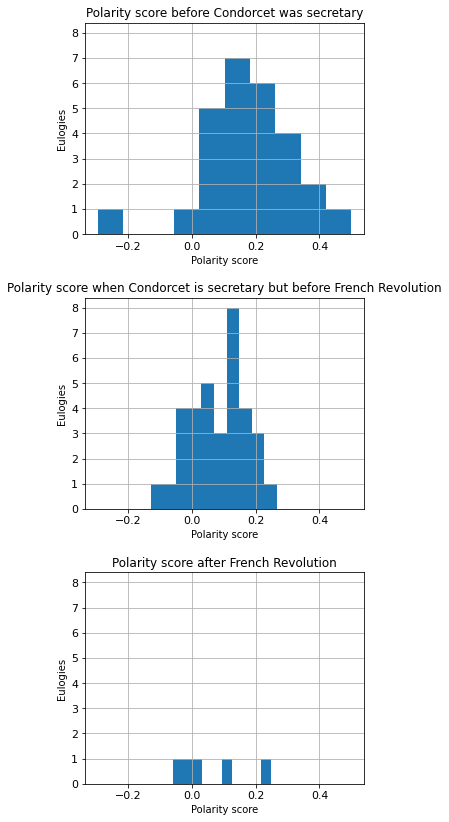

In [60]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (5, 14), sharex = True, sharey = True)

df[df['Annee']<1776]['polarity_score'].hist(ax = axs[0])
df[(df['Annee']>=1776) & (df['Annee']<1789)]['polarity_score'].hist(ax = axs[1])
df[df['Annee']>=1789]['polarity_score'].hist(ax = axs[2])


for i in range(3):
    axs[i].tick_params(axis='both', which='both', labelsize=11, labelbottom=True)
    axs[i].set_xlabel('Polarity score')
    axs[i].set_ylabel('Eulogies')
    
axs[0].set_title('Polarity score before Condorcet was secretary')
axs[1].set_title('Polarity score when Condorcet is secretary but before French Revolution')
axs[2].set_title('Polarity score after French Revolution')

plt.subplots_adjust(hspace=0.3)

In [62]:
df[df['polarity_score']<0]

,Savant,Auteur,Annee,Eloge,Side_Info,Number of characters,Number of words,Avg Word Length,Avg Sent Length,no_sw,no_sw_no_qu,polarity_score
4,Duclos,Condorcet,1773,"Samuel Cotreau Duclos, médecin ordinaire du ro...",[],9344,1564,4.964834,34.909091,"Samuel Cotreau Duclos, médecin ordinaire roi, ...","Samuel Cotreau Duclos, médecin ordinaire roi, ...",-0.296667
24,Bevis,Condorcet,1773,"Ce savant, mort en 1771, à l’âge de soixante-s...",[],1314,209,5.291866,34.833333,"Ce savant, mort 1771, l’âge soixante-seize ans...","Ce savant, mort 1771, l’âge soixante-seize ans...",-0.050000
33,de Jussieu,Condorcet,1779,"Joseph de Jussieu, associé de l’Académie des s...",[],19129,3277,4.830943,35.252747,"Joseph Jussieu, associé l’Académie sciences, d...","Joseph Jussieu, associé l’Académie sciences, d...",-0.083333
35,Lieutaud,Condorcet,1780,"Joseph Lieutaud, conseiller d’État, premier mé...",[],21614,3632,4.946035,36.255102,"Joseph Lieutaud, conseiller d’État, premier mé...","Joseph Lieutaud, conseiller d’État, premier mé...",-0.014214
36,Bucquet,Condorcet,1780,"Jean-Baptiste-Michel Bucquet, censeur royal, d...",[],33165,5577,4.941187,42.820312,"Jean-Baptiste-Michel Bucquet, censeur royal, d...","Jean-Baptiste-Michel Bucet, censeur royal, doc...",-0.035976
49,de Courtivron,Condorcet,1785,"Gaspard Le Compasseur de Créqui-Montfort, marq...",[],12823,2121,5.038190,28.506667,"Gaspard Le Compasseur Créqui-Montfort, marquis...","Gaspard Le Compasseur Créi-Montfort, maris Cou...",-0.017708
50,de Praslin,Condorcet,1785,"César-Gabriel de Choiseul, duc de Praslin, pai...",[],37313,6257,4.958766,31.916230,"César-Gabriel Choiseul, duc Praslin, pair Fran...","César-Gabriel Choiseul, duc Praslin, pair Fran...",-0.000952
54,Bouvart,Condorcet,1787,Le véritable éloge d’un médecin célèbre est la...,[ J’ai tiré cette anecdote d’un éloge prononcé...,32680,5411,5.034929,36.756944,Le véritable éloge d’un médecin célèbre reconn...,Le véritable éloge d’un médecin célèbre reconn...,-0.129869
55,de Lassone,Condorcet,1788,"Joseph-Marie-François de Lassone, premier méde...",[],18256,3034,5.008899,27.867925,"Joseph-Marie-François Lassone, premier médecin...","Joseph-Marie-François Lassone, premier médecin...",-0.050159
60,de Camper,Condorcet,1789,"Pierre Camper, membre du conseil d’État des Pr...",[],14624,2357,5.197285,43.811321,"Pierre Camper, membre conseil d’État Provinces...","Pierre Camper, membre conseil d’État Provinces...",-0.061528


## b. Subjectivity

Text(0.5, 1.0, 'Histogram of subjectivity though the whole corpus')

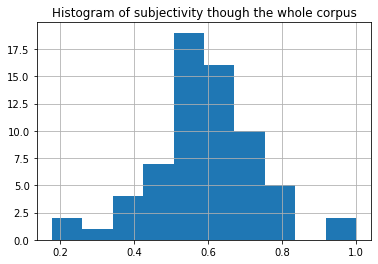

In [63]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df['subjectivity_score']=df['Eloge'].apply(lambda x : subjectivity(x))
df['subjectivity_score'].hist()

plt.title('Histogram of subjectivity though the whole corpus')

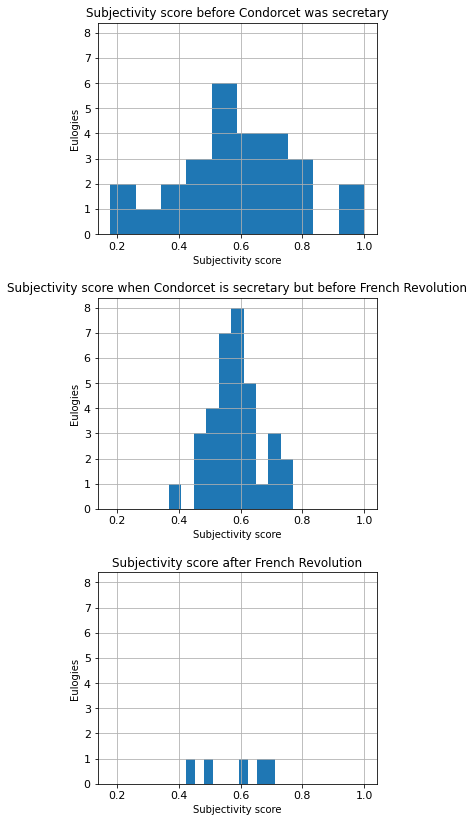

In [64]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (5, 14), sharex = True, sharey = True)

df[df['Annee']<1776]['subjectivity_score'].hist(ax = axs[0])
df[(df['Annee']>=1776) & (df['Annee']<1789)]['subjectivity_score'].hist(ax = axs[1])
df[df['Annee']>=1789]['subjectivity_score'].hist(ax = axs[2])


for i in range(3):
    axs[i].tick_params(axis='both', which='both', labelsize=11, labelbottom=True)
    axs[i].set_xlabel('Subjectivity score')
    axs[i].set_ylabel('Eulogies')
    
axs[0].set_title('Subjectivity score before Condorcet was secretary')
axs[1].set_title('Subjectivity score when Condorcet is secretary but before French Revolution')
axs[2].set_title('Subjectivity score after French Revolution')

plt.subplots_adjust(hspace=0.3)

Text(0.5, 1.0, 'Evolution of the polarity score through time')

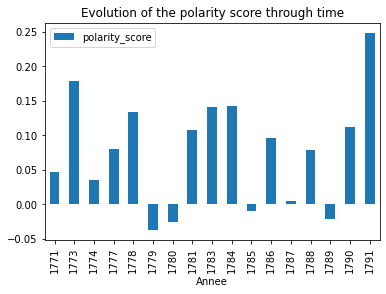

In [68]:
pol_sub = df.groupby(['Annee']).agg({'polarity_score' : 'mean', 'subjectivity_score': 'mean'}).reset_index()

pol_sub.plot('Annee', 'polarity_score', kind = 'bar')
plt.title('Evolution of the polarity score through time')

In [71]:
df[(df['Annee']==1779)|(df['Annee']==1780)|(df['Annee']==1785)|(df['Annee']==1787)|(df['Annee']==1789)]

,Savant,Auteur,Annee,Eloge,Side_Info,Number of characters,Number of words,Avg Word Length,Avg Sent Length,no_sw,no_sw_no_qu,polarity_score,subjectivity_score
33,de Jussieu,Condorcet,1779,"Joseph de Jussieu, associé de l’Académie des s...",[],19129,3277,4.830943,35.252747,"Joseph Jussieu, associé l’Académie sciences, d...","Joseph Jussieu, associé l’Académie sciences, d...",-0.083333,0.515556
34,d’Arci,Condorcet,1779,"Patrice d’Arci, pensionnaire-géomètre de l’Aca...",[],29898,4999,4.973795,29.515152,"Patrice d’Arci, pensionnaire-géomètre l’Académ...","Patrice d’Arci, pensionnaire-géomètre l’Académ...",0.007828,0.460029
35,Lieutaud,Condorcet,1780,"Joseph Lieutaud, conseiller d’État, premier mé...",[],21614,3632,4.946035,36.255102,"Joseph Lieutaud, conseiller d’État, premier mé...","Joseph Lieutaud, conseiller d’État, premier mé...",-0.014214,0.607215
36,Bucquet,Condorcet,1780,"Jean-Baptiste-Michel Bucquet, censeur royal, d...",[],33165,5577,4.941187,42.820312,"Jean-Baptiste-Michel Bucquet, censeur royal, d...","Jean-Baptiste-Michel Bucet, censeur royal, doc...",-0.035976,0.697096
49,de Courtivron,Condorcet,1785,"Gaspard Le Compasseur de Créqui-Montfort, marq...",[],12823,2121,5.038190,28.506667,"Gaspard Le Compasseur Créqui-Montfort, marquis...","Gaspard Le Compasseur Créi-Montfort, maris Cou...",-0.017708,0.611111
50,de Praslin,Condorcet,1785,"César-Gabriel de Choiseul, duc de Praslin, pai...",[],37313,6257,4.958766,31.916230,"César-Gabriel Choiseul, duc Praslin, pair Fran...","César-Gabriel Choiseul, duc Praslin, pair Fran...",-0.000952,0.598503
53,de Paulmy,Condorcet,1787,"Marc-Antoine-René de Voyer d’Argenson, marquis...",[],21939,3642,5.017847,30.324786,"Marc-Antoine-René Voyer d’Argenson, marquis Pa...","Marc-Antoine-René Voyer d’Argenson, maris Paul...",0.140714,0.591429
54,Bouvart,Condorcet,1787,Le véritable éloge d’un médecin célèbre est la...,[ J’ai tiré cette anecdote d’un éloge prononcé...,32680,5411,5.034929,36.756944,Le véritable éloge d’un médecin célèbre reconn...,Le véritable éloge d’un médecin célèbre reconn...,-0.129869,0.698779
60,de Camper,Condorcet,1789,"Pierre Camper, membre du conseil d’État des Pr...",[],14624,2357,5.197285,43.811321,"Pierre Camper, membre conseil d’État Provinces...","Pierre Camper, membre conseil d’État Provinces...",-0.061528,0.422540
61,Fougeroux,Condorcet,1789,"Auguste Denis Fougeroux, de l’Institut de Bolo...",[],10640,1743,5.095812,33.490196,"Auguste Denis Fougeroux, l’Institut Bologne ; ...","Auguste Denis Fougeroux, l’Institut Bologne ; ...",-0.016815,0.680655


In [74]:
df.sort_values(by = 'polarity_score').head(5)

,Savant,Auteur,Annee,Eloge,Side_Info,Number of characters,Number of words,Avg Word Length,Avg Sent Length,no_sw,no_sw_no_qu,polarity_score,subjectivity_score
4,Duclos,Condorcet,1773,"Samuel Cotreau Duclos, médecin ordinaire du ro...",[],9344,1564,4.964834,34.909091,"Samuel Cotreau Duclos, médecin ordinaire roi, ...","Samuel Cotreau Duclos, médecin ordinaire roi, ...",-0.296667,0.613333
54,Bouvart,Condorcet,1787,Le véritable éloge d’un médecin célèbre est la...,[ J’ai tiré cette anecdote d’un éloge prononcé...,32680,5411,5.034929,36.756944,Le véritable éloge d’un médecin célèbre reconn...,Le véritable éloge d’un médecin célèbre reconn...,-0.129869,0.698779
33,de Jussieu,Condorcet,1779,"Joseph de Jussieu, associé de l’Académie des s...",[],19129,3277,4.830943,35.252747,"Joseph Jussieu, associé l’Académie sciences, d...","Joseph Jussieu, associé l’Académie sciences, d...",-0.083333,0.515556
60,de Camper,Condorcet,1789,"Pierre Camper, membre du conseil d’État des Pr...",[],14624,2357,5.197285,43.811321,"Pierre Camper, membre conseil d’État Provinces...","Pierre Camper, membre conseil d’État Provinces...",-0.061528,0.422540
55,de Lassone,Condorcet,1788,"Joseph-Marie-François de Lassone, premier méde...",[],18256,3034,5.008899,27.867925,"Joseph-Marie-François Lassone, premier médecin...","Joseph-Marie-François Lassone, premier médecin...",-0.050159,0.486667


Text(0.5, 1.0, 'Evolution of the subjectivity score through time')

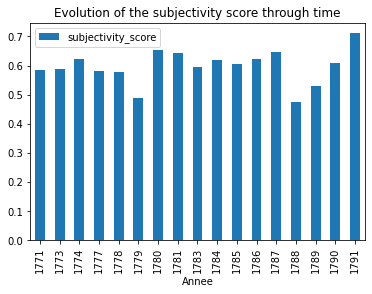

In [69]:
pol_sub.plot('Annee', 'subjectivity_score', kind = 'bar')
plt.title('Evolution of the subjectivity score through time')

# 10. Named Entity Recognition

In [20]:
import spacy
from spacy import displacy

NER = spacy.load("fr_core_news_sm")

In [21]:
def calc_freq(ner):
    dict_count = {}
    for word in ner.ents:
        if word.label_ in dict_count.keys():
            dict_count[word.label_] +=1
        else :
            dict_count[word.label_] = 1
    return dict_count

In [22]:
df['NER'] = df['Eloge_lem'].apply(lambda x : calc_freq(NER(x)))
df['NER_list'] = df['Eloge_lem'].apply(lambda x: NER(x).ents)

In [23]:
df = pd.concat([df, df['NER'].apply(pd.Series)], axis=1)

In [24]:
df.head()

,Savant,Auteur,Annee,Eloge,Eloge_no_sw_no_punkt,Eloge_lem,NER,NER_list,PER,LOC,MISC,ORG
0,de la Chambre,Condorcet,1773,"[Condorcet avait mis, en marge de cette premiè...",Condorcet mis marge cette première partie Élog...,Condorcet mettre marge ce premier partie Éloge...,"{'PER': 86, 'LOC': 12, 'MISC': 7, 'ORG': 3}","((Condorcet), (Éloges), (Marin, cureau), (Mans...",86.0,12.0,7.0,3.0
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou...",Nicolas Frenicle Bessy conseiller cour monnaie...,Nicolas Frenicle Bessy conseiller cour monnaie...,"{'PER': 9, 'LOC': 1, 'MISC': 1}","((Nicolas, Frenicle), (magistrat, list), (Ferm...",9.0,1.0,1.0,NaN
2,Picard,Condorcet,1773,[Voyez sur Picard l’Histoire céleste. Il a sou...,Voyez Picard Histoire céleste soupçonné raccou...,Voyez picard histoire céleste soupçonner racco...,"{'MISC': 3, 'PER': 35, 'LOC': 16, 'ORG': 1}","((Voyez, picard, histoire), (Picard), (Kepler)...",35.0,16.0,3.0,1.0
3,Mariotte,Condorcet,1773,"Edme Mariotte naquit à Dijon, ou du moins il y...",Edme Mariotte naquit Dijon moins passa partie ...,Edme mariotte naître dijon moins passa partie ...,"{'PER': 15, 'ORG': 2, 'LOC': 3, 'MISC': 3}","((Edme), (Mariotte), (vaincr), (galilée, pasca...",15.0,3.0,3.0,2.0
4,Duclos,Condorcet,1773,"Samuel Cotreau Duclos, médecin ordinaire du ro...",Samuel Cotreau Duclos médecin ordinaire roi pr...,Samuel Cotreau Duclos médecin ordinaire roi pr...,"{'PER': 12, 'ORG': 2, 'MISC': 2, 'LOC': 3}","((Duclos), (Stahl, Duclos), (Jusque, utiliter)...",12.0,3.0,2.0,2.0


<AxesSubplot:>

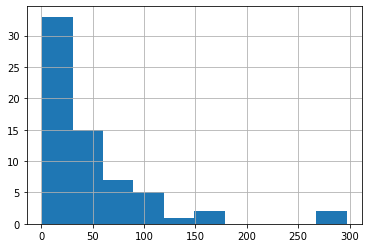

In [25]:
df['PER'].hist()

Text(0.5, 1.0, 'Average of PER cited per year')

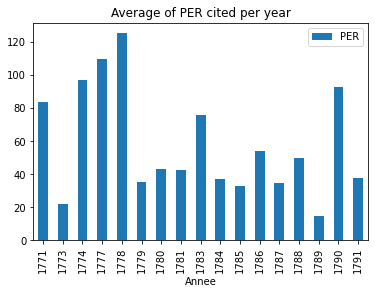

In [30]:
df_help = df.groupby(['Annee']).agg({'PER' : 'mean'}).reset_index()

df_help.plot('Annee', 'PER', kind = 'bar')
plt.title('Average of PER cited per year')


In [35]:
dic = {}
dict_per = {}

for i in range(0,ners.shape[0]):
    for j in ners.loc[i, 'NER_list']:
        if j.text in dic :
            dic[j.text].add(i)
            if j.label_ == 'PER' and j.text in dict_per:
                dict_per[j.text].add(i)
            elif j.label == 'PER' :
                dict_per[j.text] = set()
                dict_per[j.text].add(i) 
        else :
            dic[j.text] = set()
            dic[j.text].add(i)
            if j.label_ == 'PER':
                dict_per[j.text] = set()
                dict_per[j.text].add(i)

In [36]:
dict_count = {} 
for key, value in dic.items():
    dict_count[key] = len(value)
    
dict_per_count = {}

for key, value in dict_per.items():
    dict_per_count[key] = len(value) 

In [38]:
from collections import OrderedDict

d_descending = OrderedDict(sorted(dict_count.items(), key=lambda kv: kv[1], reverse=True))
d_per_descending = OrderedDict(sorted(dict_per_count.items(), key=lambda kv: kv[1], reverse=True))

In [39]:
d_descending

OrderedDict([('France', 40),
             ('Paris', 38),
             ('Europe', 36),
             ('vi', 31),
             ('Académie', 16),
             ('zèl', 16),
             ('sen', 15),
             ('Angleterre', 15),
             ('homm', 14),
             ('Descartes', 13),
             ('Newton', 13),
             ('Allemagne', 12),
             ('Voltaire', 12),
             ('académie', 12),
             ('Sciences', 10),
             ('Italie', 10),
             ('Rome', 9),
             ('Dieu', 9),
             ('Lorsqu', 9),
             ('Londres', 8),
             ('Louis xiv', 7),
             ('Louis XIV', 7),
             ('Anglais', 7),
             ('Leibniz', 7),
             ('Hollande', 7),
             ('Espagne', 7),
             ('confianc', 6),
             ('pascal', 6),
             ('Charles', 6),
             ('Jussieu', 6),
             ('Jean Bernoulli', 6),
             ('Alembert', 6),
             ('habitud', 6),
             ('Frédéric', 5),
  

In [40]:
d_per_descending

OrderedDict([('sen', 15),
             ('Descartes', 13),
             ('Newton', 13),
             ('homm', 13),
             ('Voltaire', 12),
             ('Sciences', 10),
             ('Lorsqu', 9),
             ('Louis xiv', 7),
             ('Louis XIV', 7),
             ('Leibniz', 7),
             ('confianc', 6),
             ('Charles', 6),
             ('Jussieu', 6),
             ('Jean Bernoulli', 6),
             ('Alembert', 6),
             ('habitud', 6),
             ('Frédéric', 5),
             ('Jardin', 5),
             ('famill', 5),
             ('veill', 5),
             ('Duhamel', 5),
             ('Richelieu', 4),
             ('Hippocrate', 4),
             ('fermat', 4),
             ('Euler', 4),
             ('sagess', 4),
             ('Réaumur', 4),
             ('Maupertuis', 4),
             ('aristote', 3),
             ('Roberval', 3),
             ('Picard', 3),
             ('progrè', 3),
             ('Colbert', 3),
             ('Cassini', 3),

- Lexical complexity
- Synonyms sets
- Evolution of most frequent words in the eulogies
- https://www.frontiersin.org/articles/10.3389/frma.2018.00037/full
